<a href="https://colab.research.google.com/github/illNO/Deep-Learning/blob/main/DL2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

By Igor Shevchuk 10/01/2021

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
# filter warnings
warnings.filterwarnings('ignore')
# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the
# files in the input directory
import os
# print(os.listdir("../input"))
# Any results you write to the current directory are saved as output.

In [ ]:
# read train
train = pd.read_csv('drive/MyDrive/Educ/5 Course/DL/Lab2/train.csv')
print(train.shape)
train.head()

(42000, 785)


,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,pixel11,pixel12,pixel13,pixel14,pixel15,pixel16,pixel17,pixel18,pixel19,pixel20,pixel21,pixel22,pixel23,pixel24,pixel25,pixel26,pixel27,pixel28,pixel29,pixel30,pixel31,pixel32,pixel33,pixel34,pixel35,pixel36,pixel37,pixel38,...,pixel744,pixel745,pixel746,pixel747,pixel748,pixel749,pixel750,pixel751,pixel752,pixel753,pixel754,pixel755,pixel756,pixel757,pixel758,pixel759,pixel760,pixel761,pixel762,pixel763,pixel764,pixel765,pixel766,pixel767,pixel768,pixel769,pixel770,pixel771,pixel772,pixel773,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [ ]:
# read test
test = pd.read_csv('drive/MyDrive/Educ/5 Course/DL/Lab2/test.csv')
print(test.shape)
test.head()

(28000, 784)


,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,pixel11,pixel12,pixel13,pixel14,pixel15,pixel16,pixel17,pixel18,pixel19,pixel20,pixel21,pixel22,pixel23,pixel24,pixel25,pixel26,pixel27,pixel28,pixel29,pixel30,pixel31,pixel32,pixel33,pixel34,pixel35,pixel36,pixel37,pixel38,pixel39,...,pixel744,pixel745,pixel746,pixel747,pixel748,pixel749,pixel750,pixel751,pixel752,pixel753,pixel754,pixel755,pixel756,pixel757,pixel758,pixel759,pixel760,pixel761,pixel762,pixel763,pixel764,pixel765,pixel766,pixel767,pixel768,pixel769,pixel770,pixel771,pixel772,pixel773,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


1    4684
7    4401
3    4351
9    4188
2    4177
6    4137
0    4132
4    4072
8    4063
5    3795
Name: label, dtype: int64

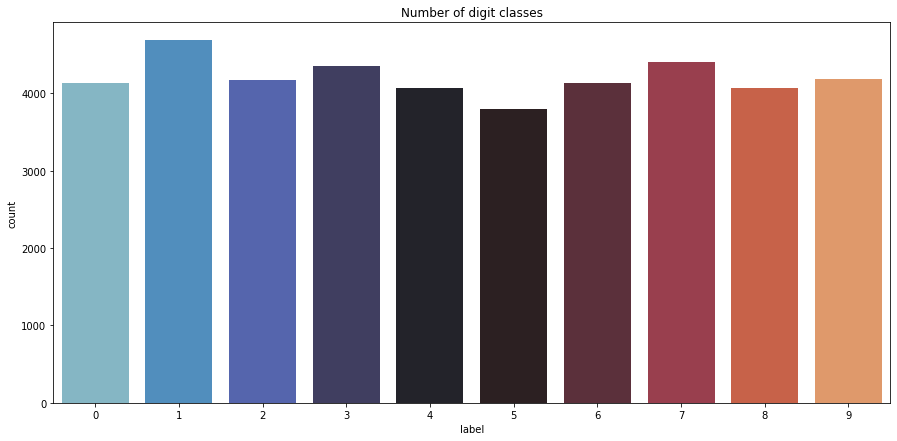

In [ ]:
# put labels into y_train variable
Y_train = train["label"]
# Drop 'label' column
X_train = train.drop(labels = ["label"],axis = 1)
# visualize number of digits classes
plt.figure(figsize=(15,7))
g = sns.countplot(Y_train, palette="icefire")
plt.title("Number of digit classes")
Y_train.value_counts()

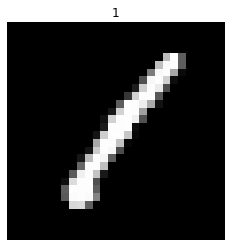

In [ ]:
# plot some samples
img = train.drop(labels = ["label"],axis = 1).iloc[0].to_numpy()
img = img.reshape((28,28))
plt.imshow(img,cmap='gray')
plt.title(train.iloc[0,0])
plt.axis("off")
plt.show()

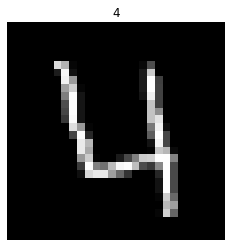

In [ ]:
# plot some samples
img = train.drop(labels = ["label"],axis = 1).iloc[3].to_numpy()
img = img.reshape((28,28))
plt.imshow(img,cmap='gray')
plt.title(train.iloc[3,0])
plt.axis("off")
plt.show()

In [ ]:
# Normalize the data
X_train = X_train / 255.0
test = test / 255.0
print("x_train shape: ",X_train.shape)
print("test shape: ",test.shape)

# Reshape
X_train = X_train.values.reshape(-1,28,28,1)
test = test.values.reshape(-1,28,28,1)
print("x_train shape: ",X_train.shape)
print("test shape: ",test.shape)

x_train shape:  (42000, 784)
test shape:  (28000, 784)
x_train shape:  (42000, 28, 28, 1)
test shape:  (28000, 28, 28, 1)


In [ ]:
# Label Encoding
from keras.utils.np_utils import to_categorical # convert to one-hot-encoding
Y_train = to_categorical(Y_train, num_classes = 10)

In [ ]:
# Split the train and the validation set for the fitting
from sklearn.model_selection import train_test_split
X_train, X_val, Y_train, Y_val = train_test_split(X_train, Y_train, test_size = 0.1
, random_state=2)
print("x_train shape",X_train.shape)
print("x_test shape",X_val.shape)
print("y_train shape",Y_train.shape)
print("y_test shape",Y_val.shape)

x_train shape (37800, 28, 28, 1)
x_test shape (4200, 28, 28, 1)
y_train shape (37800, 10)
y_test shape (4200, 10)


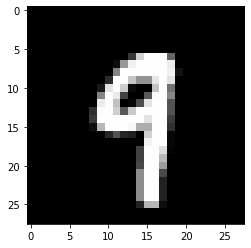

In [ ]:
# Some examples
plt.imshow(X_train[2][:,:,0],cmap='gray')
plt.show()

# Initialize model

In [ ]:
import tensorflow as tf
import itertools
from sklearn.metrics import confusion_matrix
from keras.utils.np_utils import to_categorical # convert to one-hot-encoding
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPool2D

# from tf.keras.optimizers import RMSprop,Adam

from keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import ReduceLROnPlateau
# Initialize model
model = Sequential()
# First conv layer
model.add(Conv2D(filters = 8, kernel_size = (5,5),padding = 'Same',
activation ='relu', input_shape = (28,28,1)))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(0.25))

# Second conv layer
model.add(Conv2D(filters = 16, kernel_size = (3,3),padding = 'Same',
activation ='relu'))
model.add(MaxPool2D(pool_size=(2,2), strides=(2,2)))
model.add(Dropout(0.25))

# fully connected
model.add(Flatten())
model.add(Dense(256, activation = "relu"))
model.add(Dropout(0.5))
model.add(Dense(10, activation = "softmax"))

# Define the optimizer


In [ ]:
optimizer = tf.keras.optimizers.Adam(lr=0.001, beta_1=0.9, beta_2=0.999)

# Compile the model


In [ ]:
model.compile(optimizer = optimizer , loss = "categorical_crossentropy", metrics=["accuracy"])

In [ ]:
epochs = 10 
batch_size = 250

# Data augmentation
#### To avoid overfitting, we have to create new data, based on our input.
Some types of augmentation:
- Move number to any corner
- Rotate
- Scale

In [ ]:
datagen = ImageDataGenerator(
  featurewise_center=False, # set input mean to 0 over the dataset
  samplewise_center=False, # set each sample mean to 0
  featurewise_std_normalization=False, # divide inputs by std of the dataset
  samplewise_std_normalization=False, # divide each input by its std
  zca_whitening=False, # dimesion reduction
  rotation_range=0.5, # randomly rotate images in the range 5 degrees
  zoom_range = 0.5, # Randomly zoom image 5%
  width_shift_range=0.5, # randomly shift images horizontally 5%
  height_shift_range=0.5, # randomly shift images vertically 5%
  horizontal_flip=False, # randomly flip images
  vertical_flip=False # randomly flip images
)
datagen.fit(X_train)

In [ ]:
# Fit the model
history = model.fit_generator(datagen.flow(X_train,Y_train, batch_size=batch_size),
epochs = epochs, validation_data = (X_val,Y_val), steps_per_epoch=X_train.shape[0] // batch_size)

Epoch 1/10
151/151 [==============================] - 47s 99ms/step - loss: 2.2106 - accuracy: 0.1773 - val_loss: 1.8372 - val_accuracy: 0.3731
Epoch 2/10
151/151 [==============================] - 15s 97ms/step - loss: 1.9287 - accuracy: 0.3098 - val_loss: 1.2522 - val_accuracy: 0.6612
Epoch 3/10
151/151 [==============================] - 15s 99ms/step - loss: 1.7448 - accuracy: 0.3888 - val_loss: 0.9225 - val_accuracy: 0.7881
Epoch 4/10
151/151 [==============================] - 15s 97ms/step - loss: 1.6208 - accuracy: 0.4371 - val_loss: 0.7217 - val_accuracy: 0.8255
Epoch 5/10
151/151 [==============================] - 15s 97ms/step - loss: 1.5387 - accuracy: 0.4714 - val_loss: 0.5740 - val_accuracy: 0.8612
Epoch 6/10
151/151 [==============================] - 15s 98ms/step - loss: 1.4665 - accuracy: 0.4988 - val_loss: 0.4826 - val_accuracy: 0.8712
Epoch 7/10
151/151 [==============================] - 15s 97ms/step - loss: 1.4174 - accuracy: 0.5150 - val_loss: 0.4185 - val_accuracy:

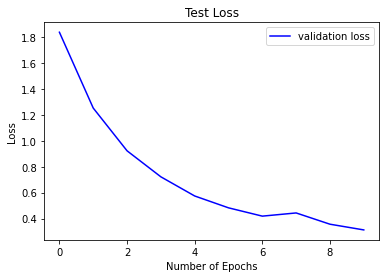

In [ ]:
# Plot the loss and accuracy curves for training and validation
plt.plot(history.history['val_loss'], color='b', label="validation loss")
plt.title("Test Loss")
plt.xlabel("Number of Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

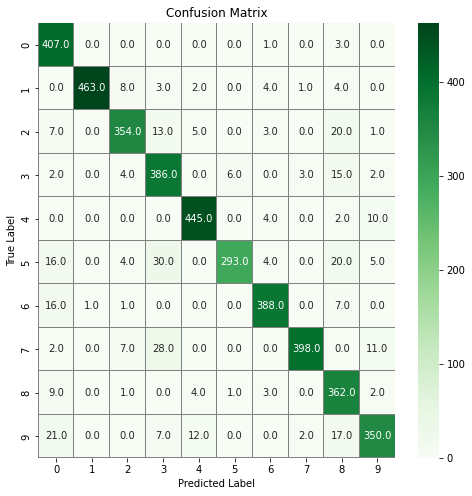

In [ ]:
# confusion matrix
import seaborn as sns
# Predict the values from the validation dataset
Y_pred = model.predict(X_val)
# Convert predictions classes to one hot vectors
Y_pred_classes = np.argmax(Y_pred,axis = 1)
# Convert validation observations to one hot vectors
Y_true = np.argmax(Y_val,axis = 1)
# compute the confusion matrix
confusion_mtx = confusion_matrix(Y_true, Y_pred_classes)
# plot the confusion matrix
f,ax = plt.subplots(figsize=(8, 8))
sns.heatmap(confusion_mtx, annot=True, linewidths=0.01,cmap="Greens",linecolor="gray", fmt= '.1f',ax=ax)
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()

# Experiment with mode convolutional layers

In [ ]:
# Initialize model
model1 = Sequential()
# First conv layer
model1.add(Conv2D(filters = 8, kernel_size = (5,5),padding = 'Same',
activation ='relu', input_shape = (28,28,1)))
model1.add(MaxPool2D(pool_size=(2,2)))
model1.add(Dropout(0.25))

# Second conv layer
model1.add(Conv2D(filters = 16, kernel_size = (4,3),padding = 'Same',
activation ='relu'))
model1.add(MaxPool2D(pool_size=(2,2), strides=(2,2)))
model1.add(Dropout(0.25))

model1.add(Conv2D(filters = 16, kernel_size = (3,3),padding = 'Same',
activation ='relu'))
model1.add(MaxPool2D(pool_size=(2,2), strides=(2,2)))
model1.add(Dropout(0.25))

# fully connected
model1.add(Flatten())
model1.add(Dense(256, activation = "relu"))
model1.add(Dropout(0.5))
model1.add(Dense(10, activation = "softmax"))

For this example we will use:
- Optimizer Nadam (Nesterov adaptive moment)
- Different parameters in image generator:
  - horizontal_flip=True (Flip images horizontally)
  - vertical_flip=True (randomly flip images) 
  - rotation_range=0.6 (randomly rotate images in the range 5 degrees)
  - featurewise_center=True

In [ ]:
optimizer = tf.keras.optimizers.Nadam(lr=0.0001, beta_1=0.9, beta_2=0.999)
model1.compile(optimizer = optimizer, loss = "categorical_crossentropy", metrics=["accuracy"])

In [ ]:
datagen = ImageDataGenerator(
  featurewise_center=False, # set input mean to 0 over the dataset
  samplewise_center=False, # set each sample mean to 0
  featurewise_std_normalization=False, # divide inputs by std of the dataset
  samplewise_std_normalization=False, # divide each input by its std
  zca_whitening=False, # dimesion reduction
  rotation_range=0.6, # randomly rotate images in the range 5 degrees
  zoom_range = 0.5, # Randomly zoom image 5%
  width_shift_range=0.5, # randomly shift images horizontally 5%
  height_shift_range=0.5, # randomly shift images vertically 5%
  horizontal_flip=True, # randomly flip images
  vertical_flip=True # randomly flip images
) 
datagen.fit(X_train)

# I added one conv layer with rectangle conv matrix

In [ ]:
# Fit the model
history = model.fit_generator(datagen.flow(X_train,Y_train, batch_size=batch_size),
epochs = epochs, validation_data = (X_val,Y_val), steps_per_epoch=X_train.shape[0] // batch_size)

Epoch 1/10
151/151 [==============================] - 15s 102ms/step - loss: 1.7855 - accuracy: 0.3674 - val_loss: 1.0275 - val_accuracy: 0.7660
Epoch 2/10
151/151 [==============================] - 15s 100ms/step - loss: 1.7575 - accuracy: 0.3749 - val_loss: 0.9876 - val_accuracy: 0.7733
Epoch 3/10
151/151 [==============================] - 15s 99ms/step - loss: 1.7465 - accuracy: 0.3777 - val_loss: 0.9487 - val_accuracy: 0.7881
Epoch 4/10
151/151 [==============================] - 15s 101ms/step - loss: 1.7340 - accuracy: 0.3848 - val_loss: 0.9193 - val_accuracy: 0.7957
Epoch 5/10
151/151 [==============================] - 15s 101ms/step - loss: 1.7241 - accuracy: 0.3901 - val_loss: 0.8994 - val_accuracy: 0.8005
Epoch 6/10
151/151 [==============================] - 15s 101ms/step - loss: 1.7141 - accuracy: 0.3916 - val_loss: 0.8732 - val_accuracy: 0.8083
Epoch 7/10
151/151 [==============================] - 15s 101ms/step - loss: 1.6954 - accuracy: 0.3991 - val_loss: 0.8387 - val_acc

- Rectangular conv matrix
- rotation_range=0.6
- horizontal_flip=*True*
- vertical_flip=True 

In [ ]:
# Fit the model
history = model1.fit_generator(datagen.flow(X_train,Y_train, batch_size=batch_size),
epochs = epochs, validation_data = (X_val,Y_val), steps_per_epoch=X_train.shape[0] // batch_size)

Epoch 1/10
151/151 [==============================] - 17s 103ms/step - loss: 2.3049 - accuracy: 0.1063 - val_loss: 2.2971 - val_accuracy: 0.1260
Epoch 2/10
151/151 [==============================] - 15s 101ms/step - loss: 2.2991 - accuracy: 0.1147 - val_loss: 2.2909 - val_accuracy: 0.1131
Epoch 3/10
151/151 [==============================] - 15s 101ms/step - loss: 2.2913 - accuracy: 0.1308 - val_loss: 2.2671 - val_accuracy: 0.2045
Epoch 4/10
151/151 [==============================] - 15s 102ms/step - loss: 2.2625 - accuracy: 0.1632 - val_loss: 2.1268 - val_accuracy: 0.2500
Epoch 5/10
151/151 [==============================] - 15s 102ms/step - loss: 2.1908 - accuracy: 0.1870 - val_loss: 1.9934 - val_accuracy: 0.2740
Epoch 6/10
151/151 [==============================] - 16s 103ms/step - loss: 2.1581 - accuracy: 0.1944 - val_loss: 1.9452 - val_accuracy: 0.2786
Epoch 7/10
151/151 [==============================] - 16s 103ms/step - loss: 2.1365 - accuracy: 0.2042 - val_loss: 1.9019 - val_ac

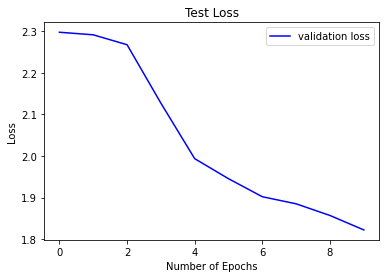

In [ ]:
# Plot the loss and accuracy curves for training and validation
plt.plot(history.history['val_loss'], color='b', label="validation loss")
plt.title("Test Loss")
plt.xlabel("Number of Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

- Rectangular conv matrix
- vertical_flip=True
- rotation_range=0.6

In [ ]:
# Fit the model
history = model.fit_generator(datagen.flow(X_train,Y_train, batch_size=batch_size),
epochs = epochs, validation_data = (X_val,Y_val), steps_per_epoch=X_train.shape[0] // batch_size)

Epoch 1/10
151/151 [==============================] - 15s 102ms/step - loss: 2.0878 - accuracy: 0.2248 - val_loss: 1.8027 - val_accuracy: 0.3993
Epoch 2/10
151/151 [==============================] - 15s 100ms/step - loss: 2.0693 - accuracy: 0.2352 - val_loss: 1.7504 - val_accuracy: 0.4264
Epoch 3/10
151/151 [==============================] - 15s 100ms/step - loss: 2.0626 - accuracy: 0.2384 - val_loss: 1.7369 - val_accuracy: 0.4617
Epoch 4/10
151/151 [==============================] - 15s 101ms/step - loss: 2.0468 - accuracy: 0.2481 - val_loss: 1.6981 - val_accuracy: 0.4674
Epoch 5/10
151/151 [==============================] - 15s 102ms/step - loss: 2.0295 - accuracy: 0.2543 - val_loss: 1.6529 - val_accuracy: 0.4738
Epoch 6/10
151/151 [==============================] - 15s 102ms/step - loss: 2.0130 - accuracy: 0.2595 - val_loss: 1.6244 - val_accuracy: 0.4705
Epoch 7/10
151/151 [==============================] - 15s 100ms/step - loss: 2.0047 - accuracy: 0.2654 - val_loss: 1.5842 - val_ac

- Rectangular conv matrix
- featurewise_center=True

In [ ]:
# Fit the model
history = model.fit_generator(datagen.flow(X_train,Y_train, batch_size=batch_size),
epochs = epochs, validation_data = (X_val,Y_val), steps_per_epoch=X_train.shape[0] // batch_size)

Epoch 1/10
151/151 [==============================] - 16s 103ms/step - loss: 1.9612 - accuracy: 0.2902 - val_loss: 1.8122 - val_accuracy: 0.3710
Epoch 2/10
151/151 [==============================] - 16s 104ms/step - loss: 1.9181 - accuracy: 0.3043 - val_loss: 1.7903 - val_accuracy: 0.3852
Epoch 3/10
151/151 [==============================] - 16s 103ms/step - loss: 1.8968 - accuracy: 0.3145 - val_loss: 1.7413 - val_accuracy: 0.4102
Epoch 4/10
151/151 [==============================] - 16s 103ms/step - loss: 1.8706 - accuracy: 0.3254 - val_loss: 1.8270 - val_accuracy: 0.3583
Epoch 5/10
151/151 [==============================] - 16s 103ms/step - loss: 1.8507 - accuracy: 0.3353 - val_loss: 1.7589 - val_accuracy: 0.3967
Epoch 6/10
151/151 [==============================] - 15s 102ms/step - loss: 1.8410 - accuracy: 0.3389 - val_loss: 1.7324 - val_accuracy: 0.3893
Epoch 7/10
151/151 [==============================] - 15s 103ms/step - loss: 1.8304 - accuracy: 0.3455 - val_loss: 1.7880 - val_ac

# Conclusion:
All tests were run on numbers dataset for 10 epochs.
- Rectangular conv matrix performs worse, than square. Accuracy: 80%
- Rotation also makes the accuracy worse, but is better because it is more universal. Accuracy: 52%
- Featurewise_center performs the worse. Accuracy: 37%

# Lenet-5

In [ ]:
model = Sequential()
model.add(Conv2D(filters=32, kernel_size=(5,5), padding='same', activation='relu',
input_shape=(28, 28, 1)))
model.add(MaxPool2D(strides=2))
model.add(Conv2D(filters=48, kernel_size=(5,5), padding='valid', activation='relu')
)
model.add(MaxPool2D(strides=2))
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dense(84, activation='relu'))
model.add(Dense(10, activation='softmax'))

In [ ]:
model.build()
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_2 (Conv2D)            (None, 28, 28, 32)        832       
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 10, 10, 48)        38448     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 5, 5, 48)          0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 1200)              0         
_________________________________________________________________
dense_2 (Dense)              (None, 256)               307456    
_________________________________________________________________
dense_3 (Dense)              (None, 84)               

In [ ]:
adam = tf.keras.optimizers.Adam(lr=5e-4)
model.compile(
  loss='categorical_crossentropy', 
  metrics=['accuracy'], 
  optimizer=adam
)

In [ ]:
# Set a learning rate annealer
reduce_lr = ReduceLROnPlateau(
  monitor='val_acc',
  patience=3,
  verbose=1,
  factor=0.2,
  min_lr=1e-6
)

In [ ]:
# Data Augmentation
datagen = ImageDataGenerator(
  rotation_range=10,
  width_shift_range=0.1,
  height_shift_range=0.1,
  zoom_range=0.1
)

datagen.fit(X_train)

In [ ]:
model.fit_generator(
  datagen.flow(X_train, Y_train, batch_size=100), 
  steps_per_epoch=len(X_train)/100,
  epochs=30, 
  validation_data=(X_val, Y_val), 
  callbacks=[reduce_lr]
)

Epoch 1/30
378/378 [==============================] - 18s 45ms/step - loss: 0.4887 - accuracy: 0.8493 - val_loss: 0.1352 - val_accuracy: 0.9598
Epoch 2/30
378/378 [==============================] - 17s 45ms/step - loss: 0.1537 - accuracy: 0.9541 - val_loss: 0.0688 - val_accuracy: 0.9769
Epoch 3/30
378/378 [==============================] - 17s 44ms/step - loss: 0.1088 - accuracy: 0.9665 - val_loss: 0.0627 - val_accuracy: 0.9788
Epoch 4/30
378/378 [==============================] - 17s 44ms/step - loss: 0.0843 - accuracy: 0.9745 - val_loss: 0.0697 - val_accuracy: 0.9814
Epoch 5/30
378/378 [==============================] - 17s 45ms/step - loss: 0.0742 - accuracy: 0.9777 - val_loss: 0.0504 - val_accuracy: 0.9848
Epoch 6/30
378/378 [==============================] - 17s 44ms/step - loss: 0.0629 - accuracy: 0.9805 - val_loss: 0.0378 - val_accuracy: 0.9867
Epoch 7/30
378/378 [==============================] - 17s 44ms/step - loss: 0.0554 - accuracy: 0.9827 - val_loss: 0.0431 - val_accuracy:

In [ ]:
score = model.evaluate(X_val, Y_val, batch_size=32)

132/132 [==============================] - 1s 4ms/step - loss: 0.0206 - accuracy: 0.9938


In [ ]:
X_test = np.array(test)
X_test = X_test/255.0
X_test = X_test.reshape((X_test.shape[0], 28, 28, 1))
Y_test = model.predict(X_test)
Y_test = np.argmax(Y_test, axis=1)
Y_test[:5]

array([8, 8, 8, 8, 8])

# General conclusion:
Dirung this lab I tested different approaches to train the model to predict hand written digits.
<br><br>
The best result was performed by model LeNet-5.
After 30 epochs it reached 99.38% validation accuracy.
<br><br>
When I tried to augment data by torating it horisontally/vertically or tried to use Featurewise_center, I got bad results (<50% accuracy on 10 classes)
<br><br>
I tried to use rectangular cernel in convolutional layer for this exact dataset, but it also performed worse, than square.